# To Eat or Not to Eat
### Predicting whether a mushroom is edible or poisnous    

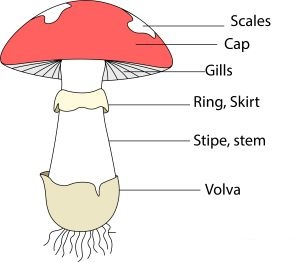

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


##  Exploring the Data (EDA)

In [2]:
#import data into DataFrame
# there are 22 features and 8124 different samples.
dataset = pd.read_csv("mushrooms.csv")
dataset.head(5) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:

values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
dataset["cap-shape"]=dataset["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
dataset["cap-surface"]=dataset["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
dataset["cap-color"]=dataset["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
dataset["odor"]=dataset["odor"].replace(values4)
values5={"a":"attached","f":"free"}
dataset["gill-attachment"]=dataset["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
dataset["gill-spacing"]=dataset["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
dataset["gill-size"]=dataset["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
dataset["gill-color"]=dataset["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
dataset["stalk-shape"]=dataset["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
dataset["stalk-root"]=dataset["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
dataset["stalk-surface-above-ring"]=dataset["stalk-surface-above-ring"].replace(values11)
dataset["stalk-surface-below-ring"]=dataset["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
dataset["stalk-color-above-ring"]=dataset["stalk-color-above-ring"].replace(values12)
dataset["stalk-color-below-ring"]=dataset["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
dataset["veil-type"]=dataset["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
dataset["veil-color"]=dataset["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
dataset["ring-number"]=dataset["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
dataset["ring-type"]=dataset["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
dataset["spore-print-color"]=dataset["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
dataset["population"]=dataset["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
dataset["habitat"]=dataset["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
dataset["bruises"]=dataset["bruises"].replace(bruises)


In [4]:
# exploring attributtes, non-null values, and their type.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# checking for missing values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
#checking for dulicate 
dataset[dataset.duplicated()].shape[0]

0

## Visualization for Data

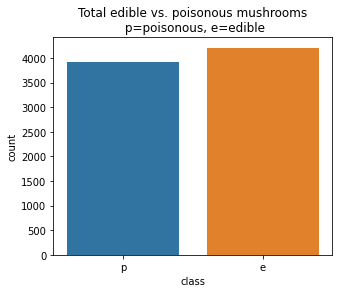

In [7]:
#visualize the count of edible vs poisonous mushroom
plt.figure(figsize=(5,4))
sns.countplot(dataset['class'])
plt.title("Total edible vs. poisonous mushrooms\n p=poisonous, e=edible")
plt.show()

In [8]:
#check distribution of the target variable 'e' &'p'
dataset['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

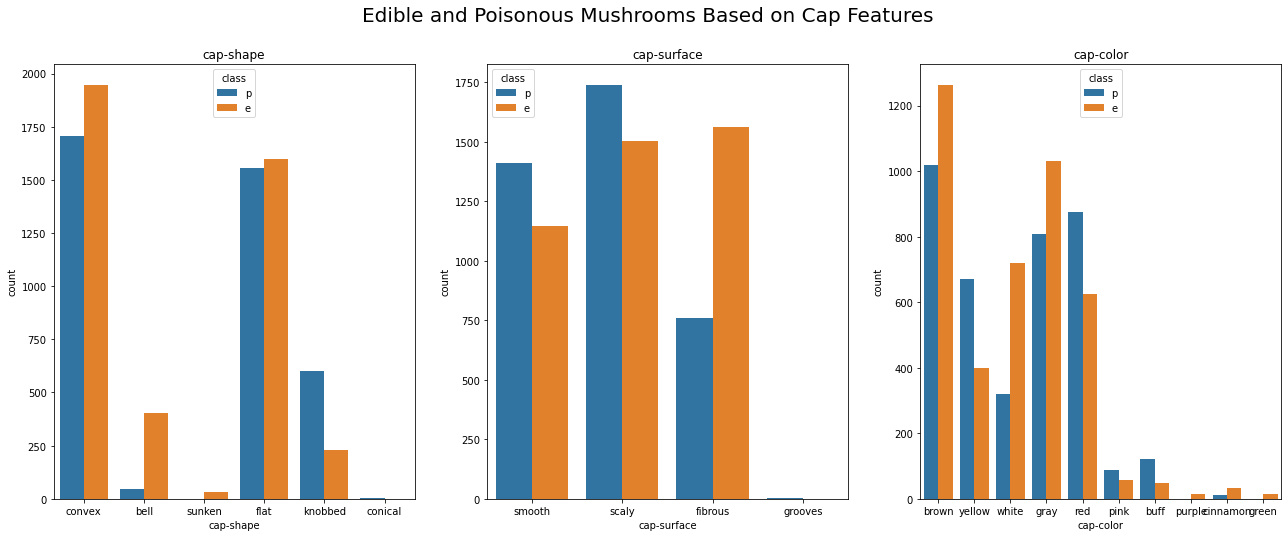

In [9]:
#visualize of edible vs. poisonous mushroom base of cap features 

fig,ax=plt.subplots(1,3,figsize=(22,8))
sns.countplot('cap-shape', hue='class', data=dataset, ax=ax[0])
ax[0].set_title('cap-shape')

sns.countplot('cap-surface', hue='class', data=dataset, ax=ax[1])
ax[1].set_title('cap-surface')

sns.countplot('cap-color',hue='class', data=dataset, ax=ax[2])
ax[2].set_title('cap-color')

fig.suptitle("Edible and Poisonous Mushrooms Based on Cap Features", fontsize=20)
plt.show()

Text(0.5, 0.98, 'Edible and Poisonous Mushrooms Based on Gill Features')

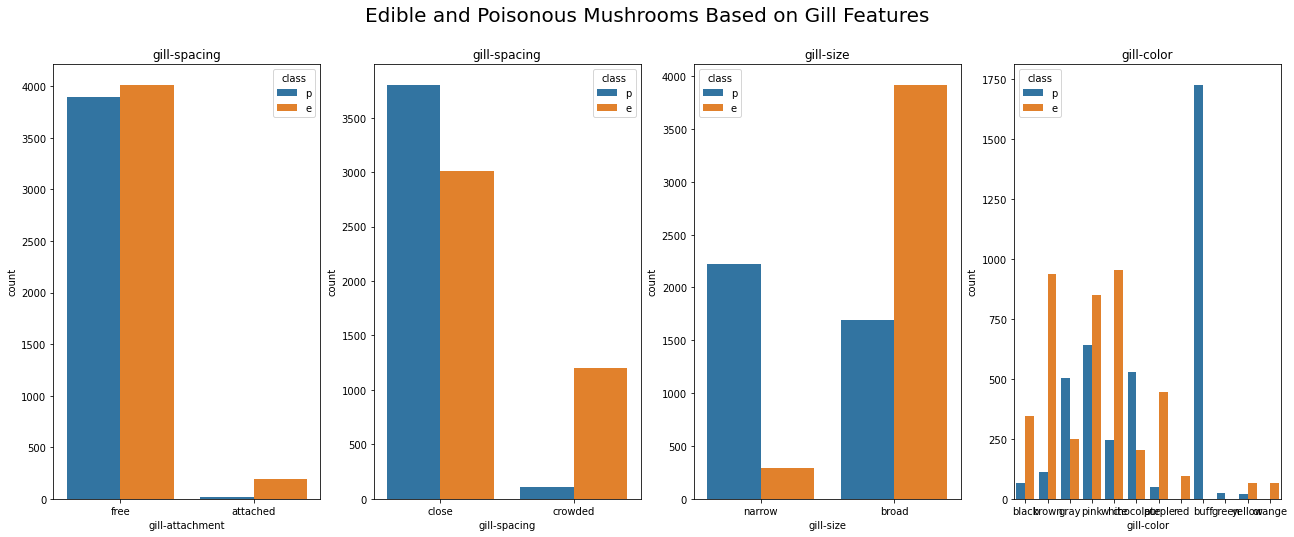

In [10]:
fig,ax=plt.subplots(1,4,figsize=(22,8))
sns.countplot('gill-attachment', hue='class', data=dataset, ax=ax[0])
ax[0].set_title('gill-spacing')
sns.countplot('gill-spacing', hue='class', data=dataset, ax=ax[1])
ax[1].set_title('gill-spacing')
sns.countplot('gill-size',hue='class', data=dataset, ax=ax[2])
ax[2].set_title('gill-size')
sns.countplot('gill-color',hue='class', data=dataset, ax=ax[3])
ax[3].set_title('gill-color')
fig.suptitle("Edible and Poisonous Mushrooms Based on Gill Features", fontsize=20)


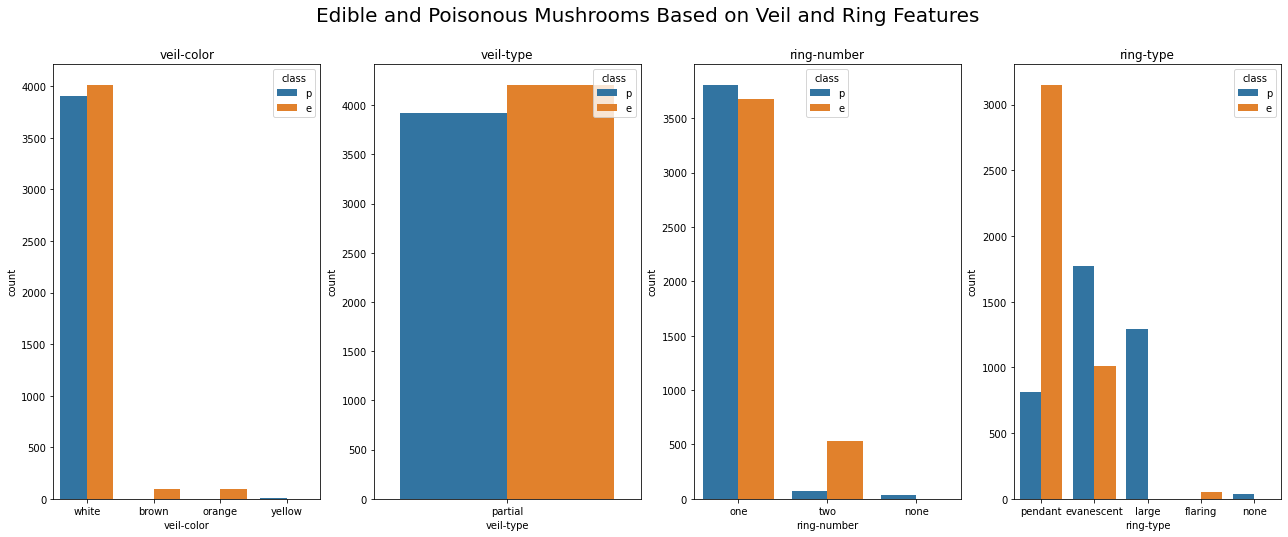

In [11]:
fig,ax=plt.subplots(1,4,figsize=(22,8))
sns.countplot('veil-color', hue='class', data=dataset, ax=ax[0])
ax[0].set_title('veil-color')

sns.countplot('veil-type', hue='class', data=dataset, ax=ax[1])
ax[1].set_title('veil-type')

sns.countplot('ring-number',hue='class', data=dataset, ax=ax[2])
ax[2].set_title('ring-number')

sns.countplot('ring-type',hue='class', data=dataset, ax=ax[3])
ax[3].set_title('ring-type')


fig.suptitle("Edible and Poisonous Mushrooms Based on Veil and Ring Features", fontsize=20)

plt.show()

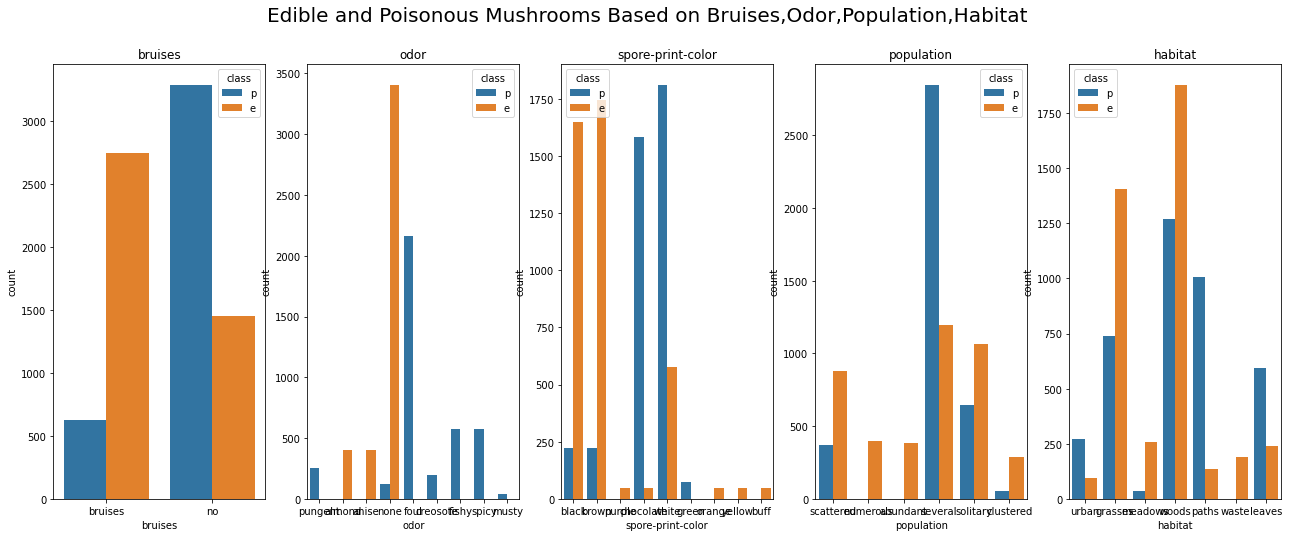

In [12]:
fig,ax=plt.subplots(1,5,figsize=(22,8))
sns.countplot('bruises', hue='class', data=dataset, ax=ax[0])
ax[0].set_title('bruises')

sns.countplot('odor', hue='class', data=dataset, ax=ax[1])
ax[1].set_title('odor')

sns.countplot('spore-print-color',hue='class', data=dataset, ax=ax[2])
ax[2].set_title('spore-print-color')

sns.countplot('population',hue='class', data=dataset, ax=ax[3])
ax[3].set_title('population'), 

sns.countplot('habitat',hue='class', data=dataset, ax=ax[4])
ax[4].set_title('habitat')

fig.suptitle("Edible and Poisonous Mushrooms Based on Bruises,Odor,Population,Habitat", fontsize=20)

plt.show()

In [13]:
#edibility of mushroom by habitat
habit = pd.crosstab(index=dataset['class'], columns=dataset['habitat'])
all_habitat = pd.DataFrame(habit)
all_habitat

habitat,grasses,leaves,meadows,paths,urban,waste,woods
class,,,,,,,
e,1408,240,256,136,96,192,1880
p,740,592,36,1008,272,0,1268


<function matplotlib.pyplot.show(close=None, block=None)>

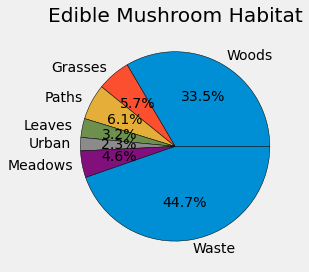

In [14]:
#percentage of edible mushroom in habitat.

plt.style.use('fivethirtyeight')
slices = [1408,240,256,136,96,192,1880] #edible
labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste',]
colors =['orange','blue']
plt.pie(slices, labels=labels,autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title('Edible Mushroom Habitat')
plt.tight_layout()
plt.show

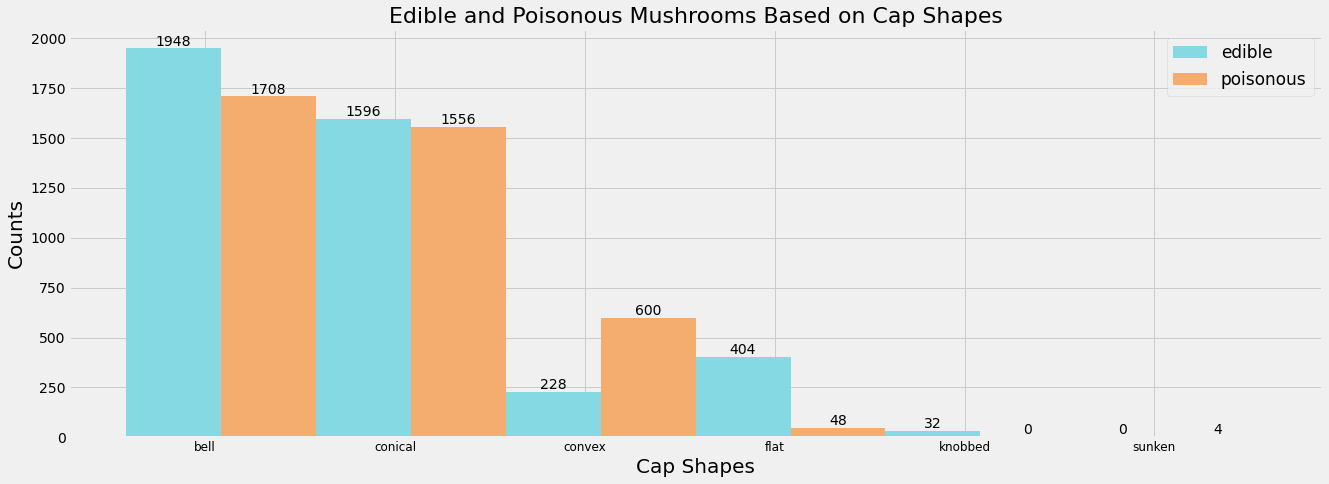

[1948, 1596, 228, 404, 32, 0]
[1708, 1556, 600, 48, 0, 4]


In [15]:
cap_shape = dataset['cap-shape'].value_counts()
m_height = cap_shape.values.tolist() #Provides numerical values
cap_shape.axes #Provides row labels
cap_shape_labels = cap_shape.axes[0].tolist() #Converts index object to list


poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capShape in cap_shape_labels:
    size = len(dataset[dataset['cap-shape'] == capShape].index)
    edibles = len(dataset[(dataset['cap-shape'] == capShape) & (dataset['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
    ind = np.arange(6)  # the x locations for the groups
        # the width of the bars                       
width = 0.50
fig, ax = plt.subplots(figsize=(20,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#84D9E2')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#F5AD6F')

#Add text for labels, title and axes ticks
ax.set_xlabel("Cap Shapes",fontsize=20)
ax.set_ylabel('Counts',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Shapes',fontsize=22)
ax.set_xticks(ind + width / 3) 
ax.set_xticklabels(('bell','conical','convex','flat','knobbed','sunken'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
#Auto-labels the number of mushrooms for each bar color.


def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(poison_bars) 
autolabel(edible_bars)
plt.show() #Display bars. 
plt.show()
print(edible_cc)
print(poisonous_cc)

In [16]:
# need to convert categorical features into numerical values.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode all columns
dataset= dataset.apply(LabelEncoder().fit_transform)  
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


## Creating Models

In [17]:
#Logistic Regression
#KNeighbors
#Multilayer Perceptron
#Support Vector Classification

In [18]:
#split the data into independent 'X' and dependent 'Y' variables
X = dataset.iloc[:, 1:20].values
Y = dataset.iloc[:, 0].values   #target 

In [19]:
#split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [21]:
#machine learning models
def models(X_train, Y_train):

#Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state =0)
    log.fit(X_train, Y_train)

#KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors =2, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)

    print('[0])Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1])K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
   
    
    return log, knn, 

In [22]:
#results for all train model
model = models(X_train, Y_train)
model

[0])Logistic Regression Training Accuracy:  0.9586090167718111
[1])K Neighbors Training Accuracy:  0.9992306508693645


(LogisticRegression(random_state=0), KNeighborsClassifier(n_neighbors=2))

## Testing accuracy for test model

In [23]:
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    accur = (TP + TN)/(TP + TN + FP + FN)

    cm
    print('Model[{}] Testing Accuracy = "{}"'.format(i, accur))
    print()
    

Model[0] Testing Accuracy = "0.96"

Model[1] Testing Accuracy = "0.9987692307692307"



### Predict X_test

In [24]:
#model prediction K Neighbors
pred = model[1].predict(X_test)
print(pred)

#actual value 
print(Y_test)

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]


In [25]:
#model prediction MLP 
pred = model[2].predict(X_test)
print(pred)

#actual value
print(Y_test)

IndexError: tuple index out of range

## Mushroom prediction 

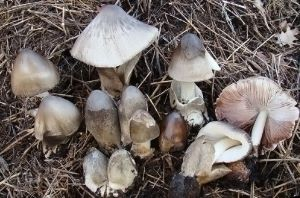

In [ ]:
my_guess = [[1,4,0,0,0,0,4,1,0,3,0,0,0,2,1,1,1,5,6]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_guess_scale = sc.fit_transform(my_guess)

pred = model[0].predict(my_guess_scale)
pred 
if pred == 0:
    print("Yumm, I can eat this!")
else:
    print('Oh no, this is not edible!')



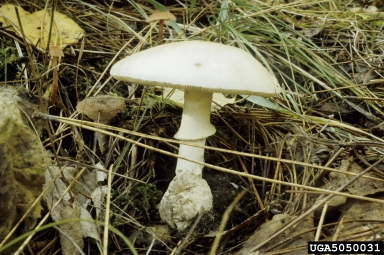

In [ ]:
my_guess = [[2,3,9,0,0,1,0,0,0,0,3,7,7,0,1,4,1,2,0]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_guess_scale = sc.fit_transform(my_guess)

pred = model[0].predict(my_guess_scale)
pred 
if pred == 0:
    print("Yumm, I can eat this!")
else:
    print('Oh no, this is not edible!')#2,3,0,1,6,0,0,11,10,2,7,7,0,2,0,1,1,3,4 my guess
                            #2,3,0,0,7,1,0,1,0,3,7,7,0,2,1,4,0,3,4 p 